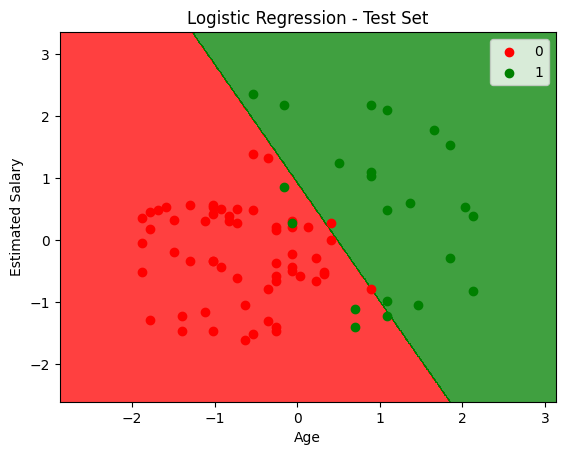

Confusion Matrix: [[57  1]
 [ 5 17]]
Accuracy: 0.925


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score

from matplotlib.colors import ListedColormap
 
# Step 1: Download the dataset
dataset = pd.read_csv('Social_Network_Ads(1).csv')

# Step 2: Prepare the data
X = dataset[['Age', 'EstimatedSalary']].values
y = dataset['Purchased'].values

# Step 3: Data preprocessing
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 4: Split the dataset into the Training set and Test Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Step 5: Build and train the logistic regression model
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

# Step 6: Create the confusion matrix
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Step 7: Visualize the logistic regression 
x1, x2 = np.meshgrid(np.arange(start=X_test[:, 0].min() - 1, stop=X_test[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_test[:, 1].min() - 1, stop=X_test[:, 1].max() + 1, step=0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha=0.75,
             cmap=ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_test)):
    plt.scatter(X_test[y_test == j, 0], X_test[y_test == j, 1], c=['red', 'green'][i], label=j)

plt.title('Logistic Regression - Test Set')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Step 8: Evaluate the model's performance
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:",cm)

print("Accuracy:", accuracy)






Both the logistic regression and KNN models performed well in predicting the buyers of the new mobile phone. The logistic regression model had an accuracy of 0.925 and a few misclassifications, while the KNN model achieved an accuracy of 0.925 with even fewer misclassifications. Overall, the KNN model performed slightly better in terms of accuracy and precision.